<a href="https://colab.research.google.com/github/thoxinloi/ai/blob/main/W4(Fuzzylogic)_24_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 40.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5b7b6e08569e98e470967eb4837e4734dfa91c98e9ee98492b34cef7147628e7
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


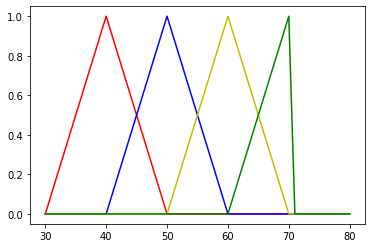

In [ ]:
# ham trimf
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30, 81, 1)
slow = fuzz.trimf(x,[30,40,50])
medium = fuzz.trimf(x,[40,50,60])
medium_fast = fuzz.trimf(x,[50,60,70])
full_speed = fuzz.trimf(x,[60,70,70])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')
plt.plot(x,medium,'b',linewidth=1.5,label='Medium')
plt.plot(x,medium_fast,'y',linewidth=1.5,label='Medium Fast')
plt.plot(x,full_speed,'g',linewidth=1.5,label='Full Speed')

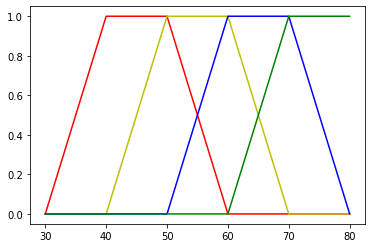

In [ ]:
# ham trapmf
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30, 81, 1)
slow = fuzz.trapmf(x,[30,40,50,60])
medium = fuzz.trapmf(x,[40,50,60,70])
medium_fast = fuzz.trapmf(x,[50,60,70,80])
full_speed = fuzz.trapmf(x,[60,70,80,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')
plt.plot(x,medium,'y',linewidth=1.5,label='Medium')
plt.plot(x,medium_fast,'b',linewidth=1.5,label='Medium Fast')
plt.plot(x,full_speed,'g',linewidth=1.5,label='Full Speed')

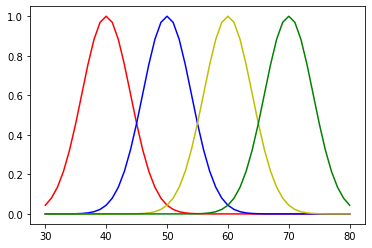

In [ ]:
# ham gaussmf
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30, 81, 1)
slow = fuzz.gaussmf(x,40,4)
medium = fuzz.gaussmf(x,50,4)
medium_fast = fuzz.gaussmf(x,60,4)
full_speed = fuzz.gaussmf(x,70,4)
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')
plt.plot(x,medium,'b',linewidth=1.5,label='Medium')
plt.plot(x,medium_fast,'y',linewidth=1.5,label='Medium Fast')
plt.plot(x,full_speed,'g',linewidth=1.5,label='Full Speed')

26.666666666666657


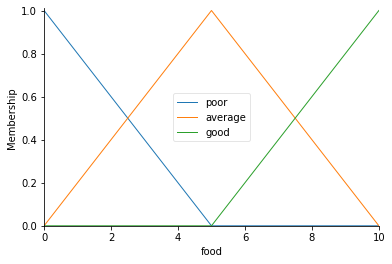

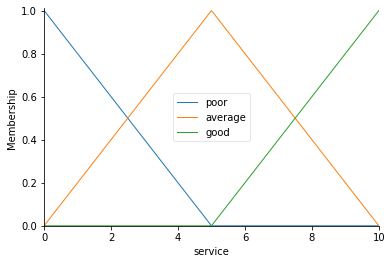

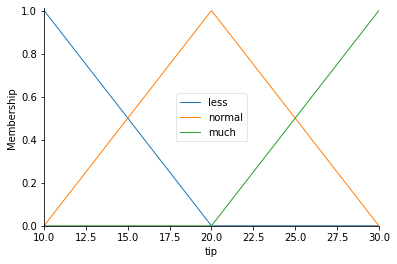

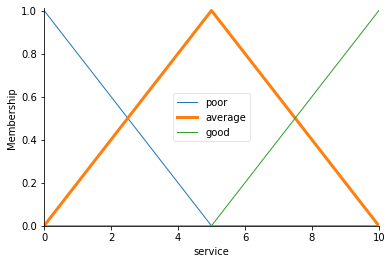

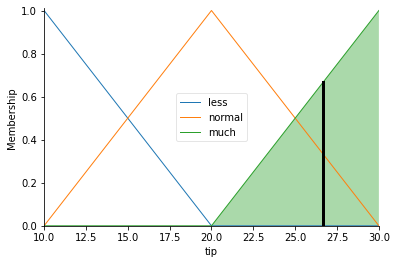

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])
tip['less'] = fuzz.trimf(tip.universe,[10,10,20])
tip['normal'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])
food.view()
service.view()
tip.view()
service['average'].view()

rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['less'])
rule4 = ctrl.Rule(food['good'] & service['poor'], tip['less'])
rule5 = ctrl.Rule(food['good'] & service['average'], tip['normal'])
rule6 = ctrl.Rule(food['good'] & service['good'], tip['much'])
rule7 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule8 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule9 = ctrl.Rule(food['average'] & service['good'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 10
tipping.input['service'] = 10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

83.18181818181819


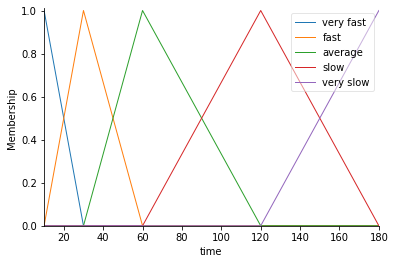

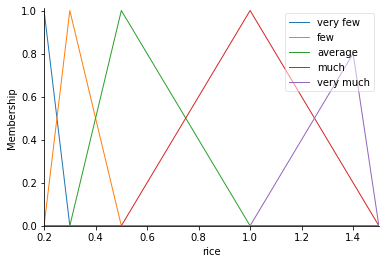

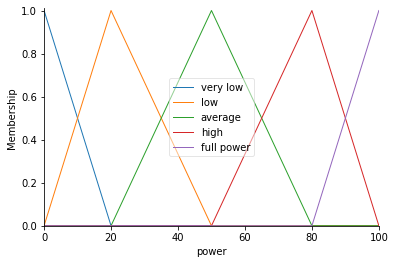

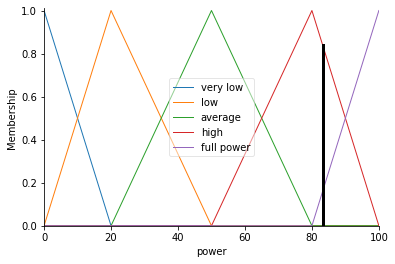

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,181,1),'time')
rice = ctrl.Antecedent(np.arange(0.2,1.6,0.1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

time['very fast'] = fuzz.trimf(time.universe,[10,10,30])
time['fast'] = fuzz.trimf(time.universe,[10,30,60])
time['average'] = fuzz.trimf(time.universe,[30,60,120])
time['slow'] = fuzz.trimf(time.universe,[60,120,180])
time['very slow'] = fuzz.trimf(time.universe,[120,180,180])
rice['very few'] = fuzz.trimf(rice.universe,[0.2,0.2,0.3])
rice['few'] = fuzz.trimf(rice.universe,[0.2,0.3,0.5])
rice['average'] = fuzz.trimf(rice.universe,[0.3,0.5,1])
rice['much'] = fuzz.trimf(rice.universe,[0.5,1,1.5])
rice['very much'] = fuzz.trimf(rice.universe,[1,1.5,1.5])
power['very low'] = fuzz.trimf(power.universe,[0,0,20])
power['low'] = fuzz.trimf(power.universe,[0,20,50])
power['average'] = fuzz.trimf(power.universe,[20,50,80])
power['high'] = fuzz.trimf(power.universe,[50,80,100])
power['full power'] = fuzz.trimf(power.universe,[80,100,100])

time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['very fast'] & rice['very few'], power['very low'])
rule2 = ctrl.Rule(time['very fast'] & rice['few'], power['low'])
rule3 = ctrl.Rule(time['very fast'] & rice['average'], power['average'])
rule4 = ctrl.Rule(time['very fast'] & rice['much'], power['high'])
rule5 = ctrl.Rule(time['very fast'] & rice['very much'], power['full power'])
rule6 = ctrl.Rule(time['fast'] & rice['very few'], power['very low'])
rule7 = ctrl.Rule(time['fast'] & rice['few'], power['low'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['average'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule10 = ctrl.Rule(time['fast'] & rice['very much'], power['full power'])
rule11 = ctrl.Rule(time['average'] & rice['very few'], power['very low'])
rule12 = ctrl.Rule(time['average'] & rice['few'], power['low'])
rule13 = ctrl.Rule(time['average'] & rice['average'], power['average'])
rule14 = ctrl.Rule(time['average'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['average'] & rice['very much'], power['full power'])
rule16 = ctrl.Rule(time['slow'] & rice['very few'], power['very low'])
rule17 = ctrl.Rule(time['slow'] & rice['few'], power['low'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['average'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['high'])
rule20 = ctrl.Rule(time['slow'] & rice['very much'], power['full power'])
rule21 = ctrl.Rule(time['very slow'] & rice['very few'], power['very low'])
rule22 = ctrl.Rule(time['very slow'] & rice['few'], power['low'])
rule23 = ctrl.Rule(time['very slow'] & rice['average'], power['average'])
rule24 = ctrl.Rule(time['very slow'] & rice['much'], power['high'])
rule25 = ctrl.Rule(time['very slow'] & rice['very much'], power['full power'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['time'] = 180
tipping.input['rice'] = 1.5
tipping.compute()
print(tipping.output['power'])
power.view(sim=tipping)